In [2]:
import numpy as np
from pylab import *
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
import matplotlib.pyplot as plt

import scipy.signal as signal
from tool._fixedInt import *
#https://github.com/aignacio/iir_filter

S1 -> b0=5509 b1=11018 b2=5509 / a0=1048576 a1=-1998080 a2=971584
S2 -> b0=5180 b1=10360 b2=5180 / a0=1048576 a1=-1878592 a2=850752
S3 -> b0=5007 b1=10014 b2=5007 / a0=1048576 a1=-1815872 a2=787328


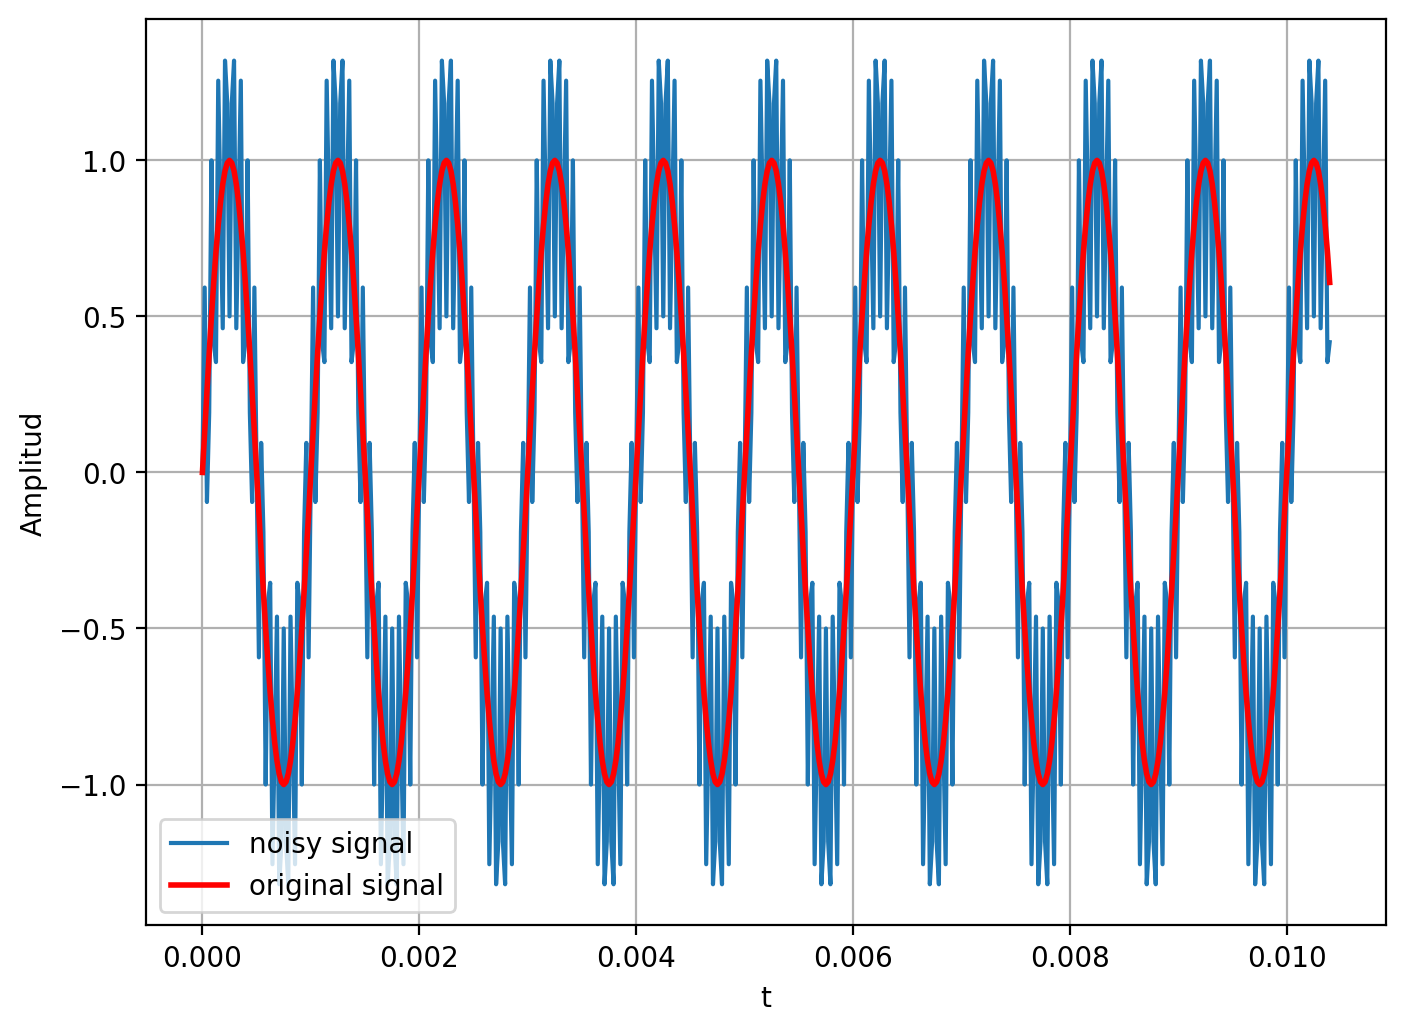

In [7]:
# Valor fraccional del sistema inicial
f = 2**20;

# Section 1
b0 = 1;
b1 = 2;
b2 = 1;
a0 = 1;
a1 = -1.905517578125;
a2 = 0.92657470703125;
k = 0.0052540302276611328125;

print('S1 -> b0={} b1={} b2={} / a0={} a1={} a2={}'.format(round(b0*k*(f)),round(b1*k*(f)),
                                                           round(b2*k*(f)),round(a0*(f)),
                                                           round(a1*(f)),round(a2*(f))));


sec1b = np.array([(b0*k), (b1*k),(b2*k)]) # Coeficientes b
sec1a = np.array([(a0)  , (a1)  ,(a2  )]) # Coeficientes a

# Section 2
b0 = 1;
b1 = 2;
b2 = 1;
a0 = 1;
a1 = -1.79156494140625;
a2 =  0.81134033203125;
k = 0.0049397945404052734375;

print('S2 -> b0={} b1={} b2={} / a0={} a1={} a2={}'.format(round(b0*k*(f)),round(b1*k*(f)),
                                                           round(b2*k*(f)),round(a0*(f)),
                                                           round(a1*(f)),round(a2*(f))));

sec2b = np.array([(b0*k), (b1*k),(b2*k)]) # Coeficientes b
sec2a = np.array([(a0)  , (a1)  ,(a2  )]) # Coeficientes a

# Section 3
b0 = 1;
b1 = 2;
b2 = 1;
a0 = 1;
a1 = -1.73175048828125;
a2 =   0.7508544921875;
k = 0.00477504730224609375;

print('S3 -> b0={} b1={} b2={} / a0={} a1={} a2={}'.format(round(b0*k*(f)),round(b1*k*(f)),
                                                           round(b2*k*(f)),round(a0*(f)),
                                                           round(a1*(f)),round(a2*(f))));

sec3b = np.array([(b0*k), (b1*k),(b2*k)]) # Coeficientes b
sec3a = np.array([(a0)  , (a1)  ,(a2  )]) # Coeficientes a

# Senal con ruido
nsamples=500;
f=1000;       # 1KHz
f2=15000;     # 15KHz
sample_rate=48000; # 48KHz

t = np.arange(nsamples) / sample_rate

noise      = 0.5*np.sin(2*pi*f2*t); 
data       = 1.0*np.sin(2*pi*f *t);
signal_gen = data + noise


#------------------------------------------------
# Plot signals
#------------------------------------------------
figure(1, figsize=(8, 6), dpi=200)

# Plot the noisy signal and original signal
plot(t, signal_gen, label='noisy signal')
plot(t, data, 'r-', linewidth=2, label='original signal') 
xlabel('t')
ylabel('Amplitud')
grid()
legend()

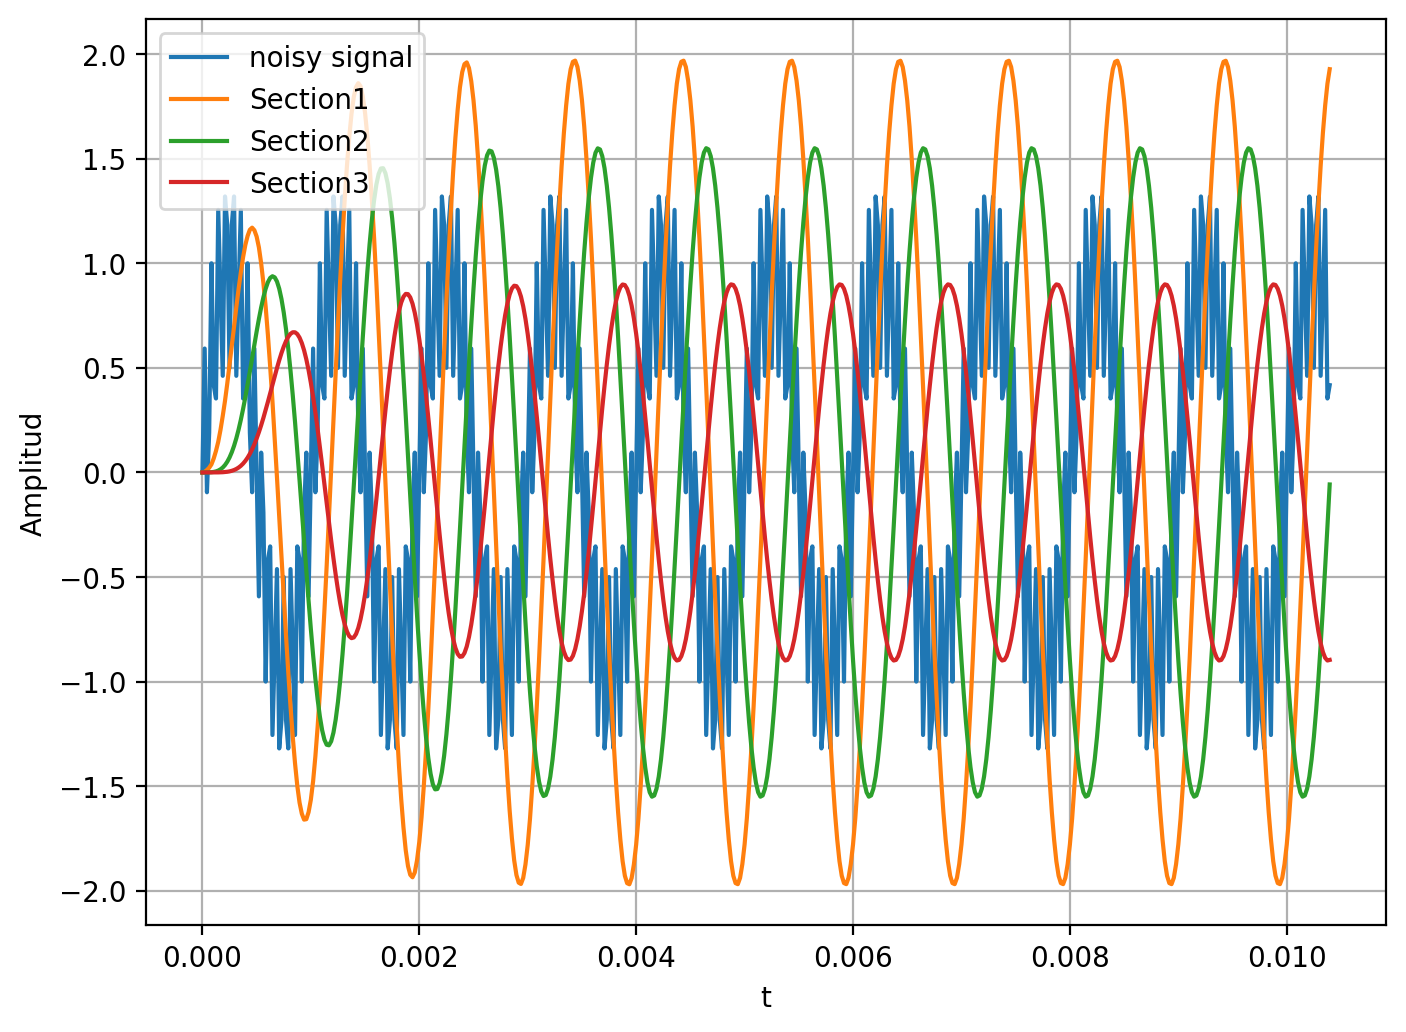

In [9]:
#------------------------------------------------
# Plot signals
#------------------------------------------------
figure(1, figsize=(8, 6), dpi=200)
# Plot the noisy signal and original signal
plot(t, signal_gen, label='noisy signal')

# Use lfilter to filter the signal with the IIR filter
filtered_signal = signal.lfilter(sec1b, sec1a, signal_gen)

figure(1, figsize=(8, 6), dpi=200)
# Plot the noisy signal and original signal
plot(t, filtered_signal, label='Section1')

filtered_signal = signal.lfilter(sec2b, sec2a, filtered_signal)

figure(1, figsize=(8, 6), dpi=200)
# Plot the noisy signal and original signal
plot(t, filtered_signal, label='Section2')

filtered_signal = signal.lfilter(sec3b, sec3a, filtered_signal)

figure(1, figsize=(8, 6), dpi=200)
# Plot the noisy signal and original signal
plot(t, filtered_signal, label='Section3')
grid()
xlabel('t')

legend()

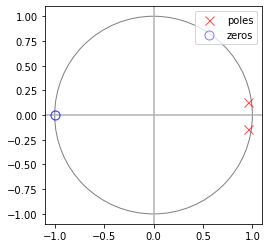

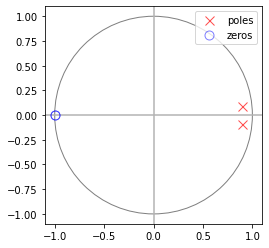

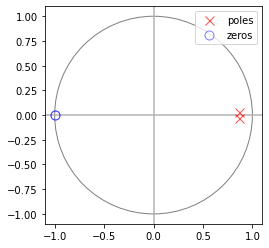

In [4]:
# Get the poles and zeros
z, p, k = signal.tf2zpk(sec1b,sec1a)

#------------------------------------------------
# Plot the IIR zeros and poles
#------------------------------------------------
plt.figure()

ax = plt.subplot(111)

# Add unit circle and zero axes
unit_circle = patches.Circle((0,0), radius=1, fill=False,color='black', ls='solid', alpha=0.5)
ax.add_patch(unit_circle)

axvline(0, color='0.7')
axhline(0, color='0.7')

# Plot the poles
poles = plt.plot(p.real, p.imag,
                 'x', markersize=9,
                 alpha=0.7,markeredgecolor='red',label='poles')

# Plot the zeros
zeros = plt.plot(z.real, z.imag,
                 'o', markersize=9,color='none', 
             alpha=0.5,markeredgecolor='blue',label='zeros')

# Scale axes to fit
r = 1.1 * np.amax(np.concatenate((abs(z), abs(p), [1])))
plt.axis('scaled')
plt.axis([-r, r, -r, r])



plt.legend()
plt.show()

# Get the poles and zeros
z, p, k = signal.tf2zpk(sec2b,sec2a)

#------------------------------------------------
# Plot the IIR zeros and poles
#------------------------------------------------
plt.figure()

ax = plt.subplot(111)

# Add unit circle and zero axes
unit_circle = patches.Circle((0,0), radius=1, fill=False,color='black', ls='solid', alpha=0.5)
ax.add_patch(unit_circle)

axvline(0, color='0.7')
axhline(0, color='0.7')

# Plot the poles
poles = plt.plot(p.real, p.imag,
                 'x', markersize=9,
                 alpha=0.7,markeredgecolor='red',label='poles')

# Plot the zeros
zeros = plt.plot(z.real, z.imag,
                 'o', markersize=9,color='none', 
             alpha=0.5,markeredgecolor='blue',label='zeros')

# Scale axes to fit
r = 1.1 * np.amax(np.concatenate((abs(z), abs(p), [1])))
plt.axis('scaled')
plt.axis([-r, r, -r, r])

plt.legend()
plt.show()


# Get the poles and zeros
z, p, k = signal.tf2zpk(sec3b,sec3a)

#------------------------------------------------
# Plot the IIR zeros and poles
#------------------------------------------------
plt.figure()

ax = plt.subplot(111)

# Add unit circle and zero axes
unit_circle = patches.Circle((0,0), radius=1, fill=False,color='black', ls='solid', alpha=0.5)
ax.add_patch(unit_circle)

axvline(0, color='0.7')
axhline(0, color='0.7')

# Plot the poles
poles = plt.plot(p.real, p.imag,
                 'x', markersize=9,
                 alpha=0.7,markeredgecolor='red',label='poles')

# Plot the zeros
zeros = plt.plot(z.real, z.imag,
                 'o', markersize=9,color='none', 
             alpha=0.5,markeredgecolor='blue',label='zeros')

# Scale axes to fit
r = 1.1 * np.amax(np.concatenate((abs(z), abs(p), [1])))
plt.axis('scaled')
plt.axis([-r, r, -r, r])



plt.legend()
plt.show()

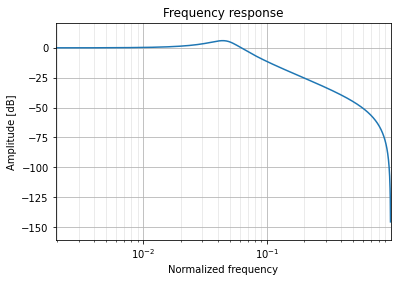

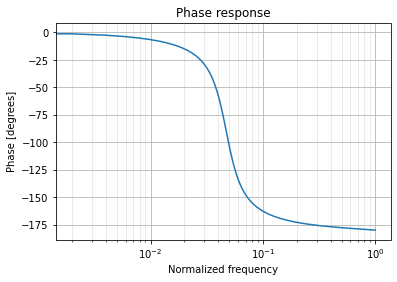

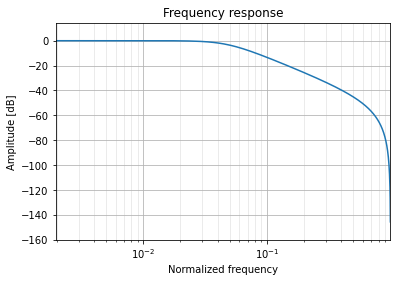

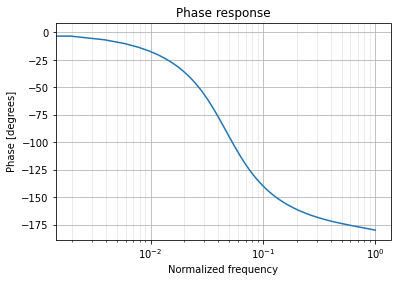

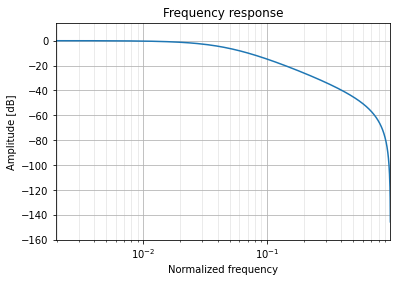

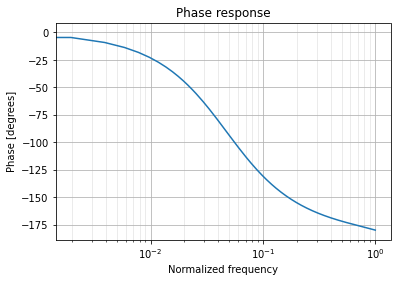

In [13]:
# Frequency response
w, h = signal.freqz(sec1b, sec1a)

#------------------------------------------------
# Plot the Frequency and Phase Response
#------------------------------------------------

plt.figure()

plt.title('Frequency response')
plt.xlabel('Normalized frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.plot(w/pi, 20*log10(abs(h)))
plt.xscale('log')
plt.show()

plt.title('Phase response')
plt.xlabel('Normalized frequency')
plt.ylabel('Phase [degrees]')
plt.grid(True, color = '0.7', linestyle='-', which='major')
plt.grid(True, color = '0.9', linestyle='-', which='minor')
plt.plot(w/pi, 180/pi * unwrap(angle(h)))
plt.xscale('log')
show()

# Frequency response
w, h = signal.freqz(sec2b, sec2a)

#------------------------------------------------
# Plot the Frequency and Phase Response
#------------------------------------------------

plt.figure()

plt.title('Frequency response')
plt.xlabel('Normalized frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.plot(w/pi, 20*log10(abs(h)))
plt.xscale('log')
plt.show()

plt.title('Phase response')
plt.xlabel('Normalized frequency')
plt.ylabel('Phase [degrees]')
plt.grid(True, color = '0.7', linestyle='-', which='major')
plt.grid(True, color = '0.9', linestyle='-', which='minor')
plt.plot(w/pi, 180/pi * unwrap(angle(h)))
plt.xscale('log')
show()

# Frequency response
w, h = signal.freqz(sec3b, sec3a)

#------------------------------------------------
# Plot the Frequency and Phase Response
#------------------------------------------------

plt.figure()

plt.title('Frequency response')
plt.xlabel('Normalized frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.plot(w/pi, 20*log10(abs(h)))
plt.xscale('log')
plt.show()

plt.title('Phase response')
plt.xlabel('Normalized frequency')
plt.ylabel('Phase [degrees]')
plt.grid(True, color = '0.7', linestyle='-', which='major')
plt.grid(True, color = '0.9', linestyle='-', which='minor')
plt.plot(w/pi, 180/pi * unwrap(angle(h)))
plt.xscale('log')
show()


********************
Sec1
0x002B
0x0056
0x002B
0x2000
0x4306
0x1DA6
********************
Sec2
0x0028
0x0050
0x0028
0x2000
0x46AB
0x19F6
********************
Sec3
0x0027
0x004E
0x0027
0x2000
0x4895
0x1807


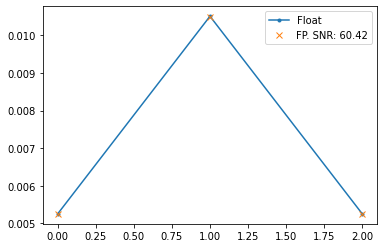

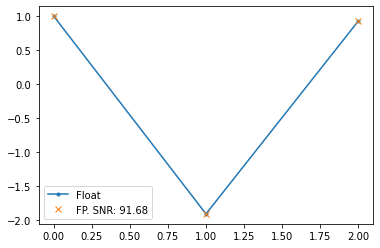

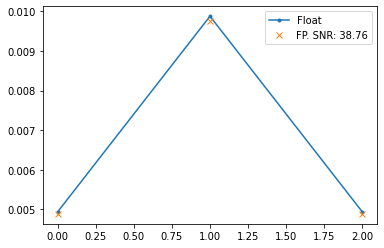

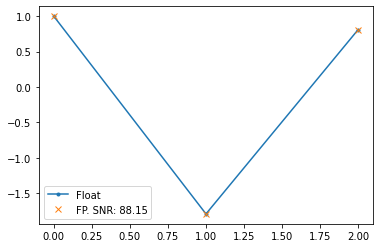

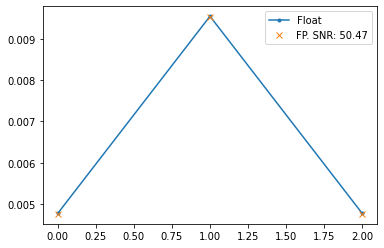

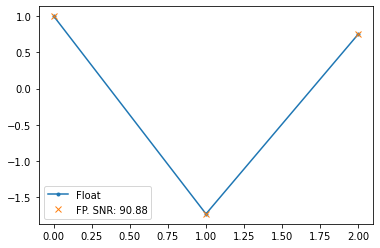

In [23]:
NB  = 15
NBF = 13

NBsin = 9
NBFsin = 7

# Section 1
print('*'*20)
print('Sec1')

sec1bq = arrayFixedInt(NB,NBF,sec1b)
[print(a.__hex__()) for a in sec1bq]
data1  = sec1b
data2  = sec1bq

#------------------------------
# Plot Coeffs
figure()
plot(np.arange(0,len(data1 )), data1 , '.-',label='Float')
value_coeff = [a.fValue for a in data2]
tmp = 10*np.log10(np.dot(data1,data1)/np.dot(data1-value_coeff,data1-value_coeff))
plot(np.arange(0,len(value_coeff)), value_coeff, 'x', label='FP. SNR: {0:.2f}'.format(float(tmp)))
legend()

sec1aq = arrayFixedInt(NB,NBF,sec1a)
[print(a.__hex__()) for a in sec1aq]
data1  = sec1a
data2  = sec1aq

#------------------------------
# Plot Coeffs
figure()
plot(np.arange(0,len(data1 )), data1 , '.-',label='Float')
value_coeff = [a.fValue for a in data2]
tmp = 10*np.log10(np.dot(data1,data1)/np.dot(data1-value_coeff,data1-value_coeff))
plot(np.arange(0,len(value_coeff)), value_coeff, 'x', label='FP. SNR: {0:.2f}'.format(float(tmp)))
legend()

# Section 2
print('*'*20)
print('Sec2')

sec2bq = arrayFixedInt(NB,NBF,sec2b)
[print(a.__hex__()) for a in sec2bq]
data1  = sec2b
data2  = sec2bq

#------------------------------
# Plot Coeffs
figure()
plot(np.arange(0,len(data1 )), data1 , '.-',label='Float')
value_coeff = [a.fValue for a in data2]
tmp = 10*np.log10(np.dot(data1,data1)/np.dot(data1-value_coeff,data1-value_coeff))
plot(np.arange(0,len(value_coeff)), value_coeff, 'x', label='FP. SNR: {0:.2f}'.format(float(tmp)))
legend()

sec2aq = arrayFixedInt(NB,NBF,sec2a)
[print(a.__hex__()) for a in sec2aq]
data1  = sec2a
data2  = sec2aq

#------------------------------
# Plot Coeffs
figure()
plot(np.arange(0,len(data1 )), data1 , '.-',label='Float')
value_coeff = [a.fValue for a in data2]
tmp = 10*np.log10(np.dot(data1,data1)/np.dot(data1-value_coeff,data1-value_coeff))
plot(np.arange(0,len(value_coeff)), value_coeff, 'x', label='FP. SNR: {0:.2f}'.format(float(tmp)))
legend()

# Section 3
print('*'*20)
print('Sec3')
sec3bq = arrayFixedInt(NB,NBF,sec3b)
[print(a.__hex__()) for a in sec3bq]
data1  = sec3b
data2  = sec3bq

#------------------------------
# Plot Coeffs
figure()
plot(np.arange(0,len(data1 )), data1 , '.-',label='Float')
value_coeff = [a.fValue for a in data2]
tmp = 10*np.log10(np.dot(data1,data1)/np.dot(data1-value_coeff,data1-value_coeff))
plot(np.arange(0,len(value_coeff)), value_coeff, 'x', label='FP. SNR: {0:.2f}'.format(float(tmp)))
legend()

sec3aq = arrayFixedInt(NB,NBF,sec3a)
[print(a.__hex__()) for a in sec3aq]
data1  = sec3a
data2  = sec3aq

#------------------------------
# Plot Coeffs
figure()
plot(np.arange(0,len(data1 )), data1 , '.-',label='Float')
value_coeff = [a.fValue for a in data2]
tmp = 10*np.log10(np.dot(data1,data1)/np.dot(data1-value_coeff,data1-value_coeff))
plot(np.arange(0,len(value_coeff)), value_coeff, 'x', label='FP. SNR: {0:.2f}'.format(float(tmp)))
legend()

Text(0, 0.5, 'Amplitude')

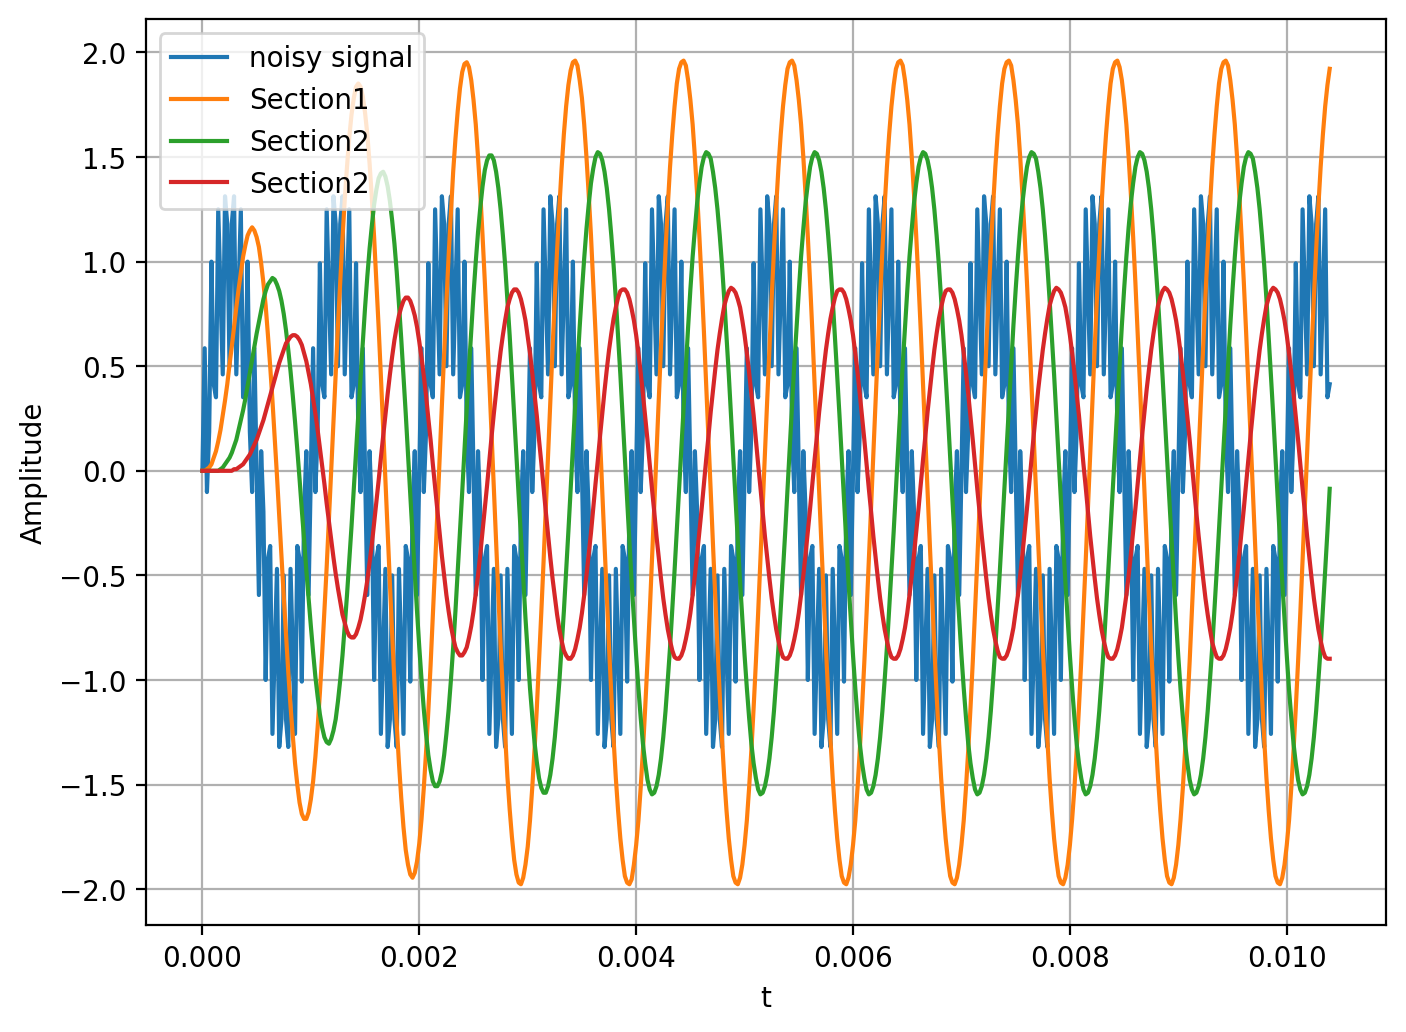

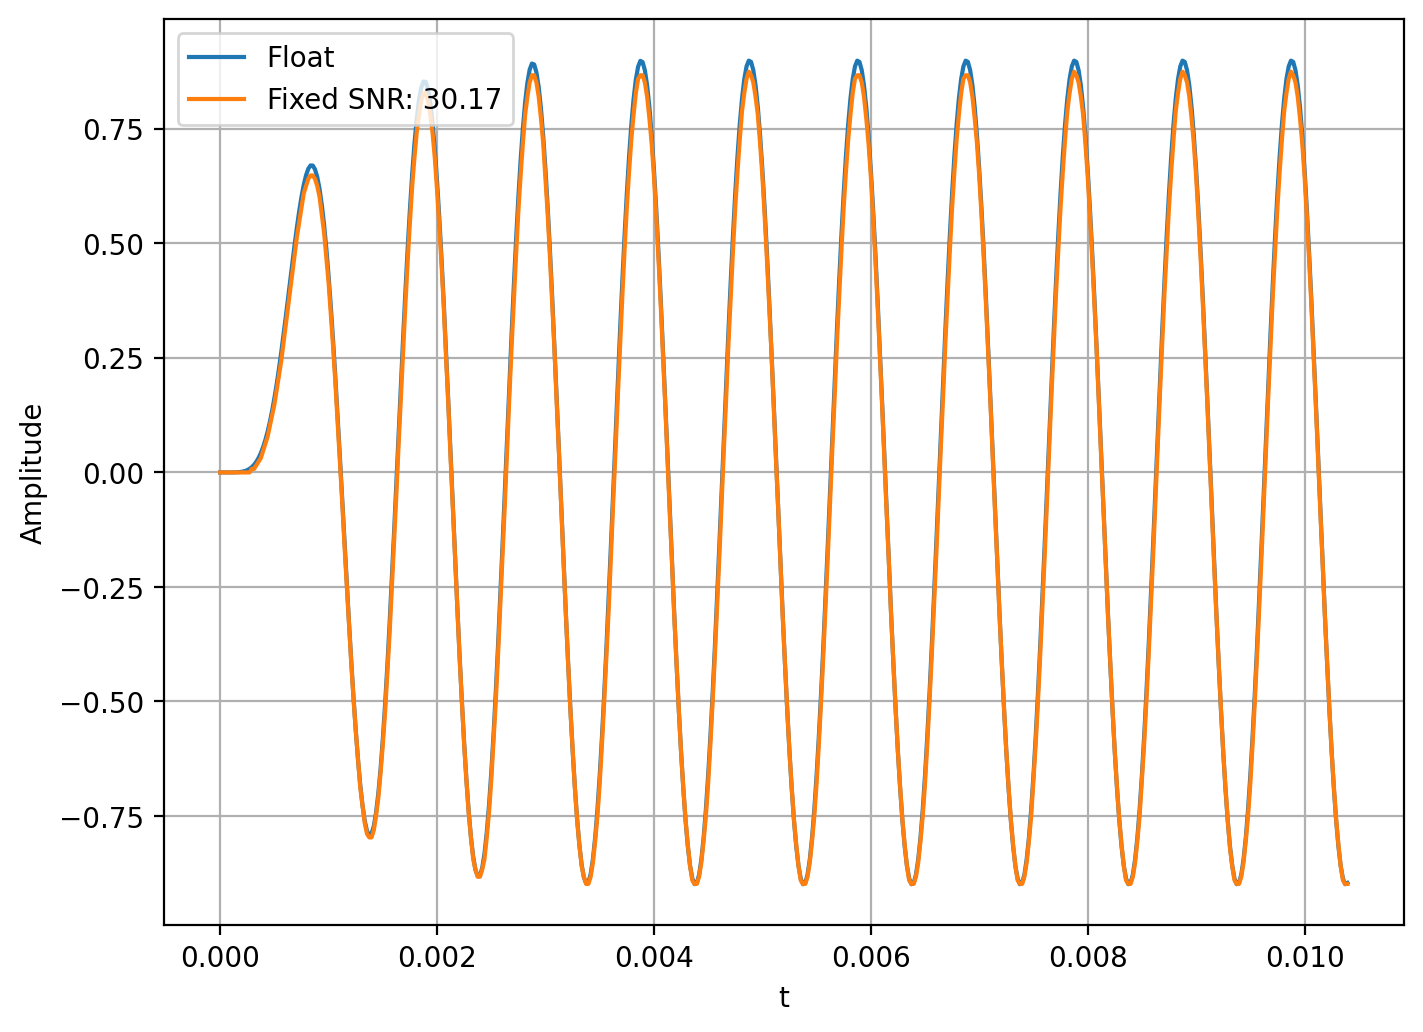

In [15]:
# Quantization of signal
signal_genq = signal_gen

signal_genq = arrayFixedInt(NBsin,NBFsin,signal_genq)
signal_genq = [a.fValue for a in signal_genq]

#------------------------------
# Plot signal
figure(1, figsize=(8, 6), dpi=200)
plot(t, signal_genq, label='noisy signal')

sec1bq = [a.fValue for a in sec1bq]
sec1aq = [a.fValue for a in sec1aq]
filtered_signalq = signal.lfilter(sec1bq, sec1aq, signal_genq)

filtered_signalq = arrayFixedInt(NBsin,NBFsin,filtered_signalq)
filtered_signalq = [a.fValue for a in filtered_signalq]

#------------------------------
# Plot signal
figure(1, figsize=(8, 6), dpi=200)
plot(t, filtered_signalq, label='Section1')

sec2bq = [a.fValue for a in sec2bq]
sec2aq = [a.fValue for a in sec2aq]
filtered_signalq = signal.lfilter(sec2bq, sec2aq, filtered_signalq)

filtered_signalq = arrayFixedInt(NBsin,NBFsin,filtered_signalq)
filtered_signalq = [a.fValue for a in filtered_signalq]

#------------------------------
# Plot signal
figure(1, figsize=(8, 6), dpi=200)
plot(t, filtered_signalq, label='Section2')

sec3bq = [a.fValue for a in sec3bq]
sec3aq = [a.fValue for a in sec3aq]
filtered_signalq = signal.lfilter(sec3bq, sec3aq, filtered_signalq)

filtered_signalq = arrayFixedInt(NBsin,NBFsin,filtered_signalq)
filtered_signalq = [a.fValue for a in filtered_signalq]

#------------------------------
# Plot signal
figure(1, figsize=(8, 6), dpi=200)
plot(t, filtered_signalq, label='Section2')
grid()
xlabel('t')
ylabel('Amplitude')
legend()

#------------------------------
# Plot signal
figure(2, figsize=(8, 6), dpi=200)
plot(t, filtered_signal,label='Float')
tmp = 10*np.log10(np.dot(filtered_signalq,filtered_signalq)/np.dot(filtered_signalq-filtered_signal,filtered_signalq-filtered_signal))
plot(t, filtered_signalq,label='Fixed SNR: {0:.2f}'.format(float(tmp)))
legend()
grid()
xlabel('t')
ylabel('Amplitude')


In [20]:
NB  = 15
NBF = 13

NBsin = 9
NBFsin = 7

def processData(sec1b,sec1a,sec2b,sec2a,sec3b,sec3a,NBsin,NBFsin,signal_gen):
    
    snrValue = []
    nbValue  = []
    for NB in range(8,32):
        NBF = NB-2
        # Section 1
        sec1bq = arrayFixedInt(NB,NBF,sec1b)
        sec1aq = arrayFixedInt(NB,NBF,sec1a)
        sec2bq = arrayFixedInt(NB,NBF,sec2b)
        sec2aq = arrayFixedInt(NB,NBF,sec2a)
        sec3bq = arrayFixedInt(NB,NBF,sec3b)
        sec3aq = arrayFixedInt(NB,NBF,sec3a)

        signal_genq = signal_gen

        signal_genq = arrayFixedInt(NBsin,NBFsin,signal_genq)
        signal_genq = [a.fValue for a in signal_genq]

        sec1bq = [a.fValue for a in sec1bq]
        sec1aq = [a.fValue for a in sec1aq]

        # Use lfilter to filter the signal with the IIR filter
        filtered_signalq = signal.lfilter(sec1bq, sec1aq, signal_genq)

        filtered_signalq = arrayFixedInt(NBsin,NBFsin,filtered_signalq)
        filtered_signalq = [a.fValue for a in filtered_signalq]

        sec2bq = [a.fValue for a in sec2bq]
        sec2aq = [a.fValue for a in sec2aq]
        filtered_signalq = signal.lfilter(sec2bq, sec2aq, filtered_signalq)

        filtered_signalq = arrayFixedInt(NBsin,NBFsin,filtered_signalq)
        filtered_signalq = [a.fValue for a in filtered_signalq]

        sec3bq = [a.fValue for a in sec3bq]
        sec3aq = [a.fValue for a in sec3aq]
        filtered_signalq = signal.lfilter(sec3bq, sec3aq, filtered_signalq)

        filtered_signalq = arrayFixedInt(NBsin,NBFsin,filtered_signalq)
        filtered_signalq = [a.fValue for a in filtered_signalq]

        tmp = 10*np.log10(np.dot(filtered_signalq,filtered_signalq)/np.dot(filtered_signalq-filtered_signal,filtered_signalq-filtered_signal))
        print(NB,tmp,'\t',np.dot(filtered_signalq,filtered_signalq),np.dot(filtered_signalq-filtered_signal,filtered_signalq-filtered_signal))
#         figure(2, figsize=(8, 6), dpi=200)
#         # Plot the noisy signal and original signal
#         plot(t, filtered_signal,label='Float')
#         #tmp = 10*np.log10(np.dot(filtered_signal,filtered_signal)/np.dot(filtered_signal-filtered_signalq,filtered_signal-filtered_signalq))
#         plot(t, filtered_signalq,label='Fixed SNR: {0:.2f}'.format(float(tmp)))
#         legend()
        
        snrValue.append(float(tmp))
        nbValue.append(NB)
        
    figure(2, figsize=(8, 6), dpi=200)
    plot(nbValue, snrValue,'.-')
    grid()
    xlabel('NB')
    ylabel('SNR[dB]')


/Library/Python/3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10


8 -inf 	 0.0 184.18366290055974
9 -23.553602840544702 	 0.76702880859375 173.84890509894402
10 -0.9857941642600183 	 47.58477783203125 59.710053788433534
11 3.799329418835375 	 76.31878662109375 31.81987835921462
12 10.063719936377764 	 129.79656982421875 12.790608961093719
13 17.003583613829804 	 152.2967529296875 3.036213329748304
14 25.885438142485334 	 171.34698486328125 0.44190880246968844
15 30.168338119517376 	 179.04888916015625 0.17224150793930415
16 30.828749417672373 	 179.4161376953125 0.14824722121526687
17 31.405752507213982 	 181.06781005859375 0.1309984021184975
18 32.01147018389947 	 182.36212158203125 0.11475922791467687
19 32.02171232132322 	 183.34814453125 0.11510794143495313
20 32.023408744354796 	 183.66729736328125 0.11526327656699607
21 32.05320050020598 	 183.7122802734375 0.11450333544877112
22 32.092251704226804 	 183.7734375 0.11351612785720419
23 32.06435426078775 	 183.75823974609375 0.1142382116892754
24 32.02801289751016 	 183.75299072265625 0.115194866

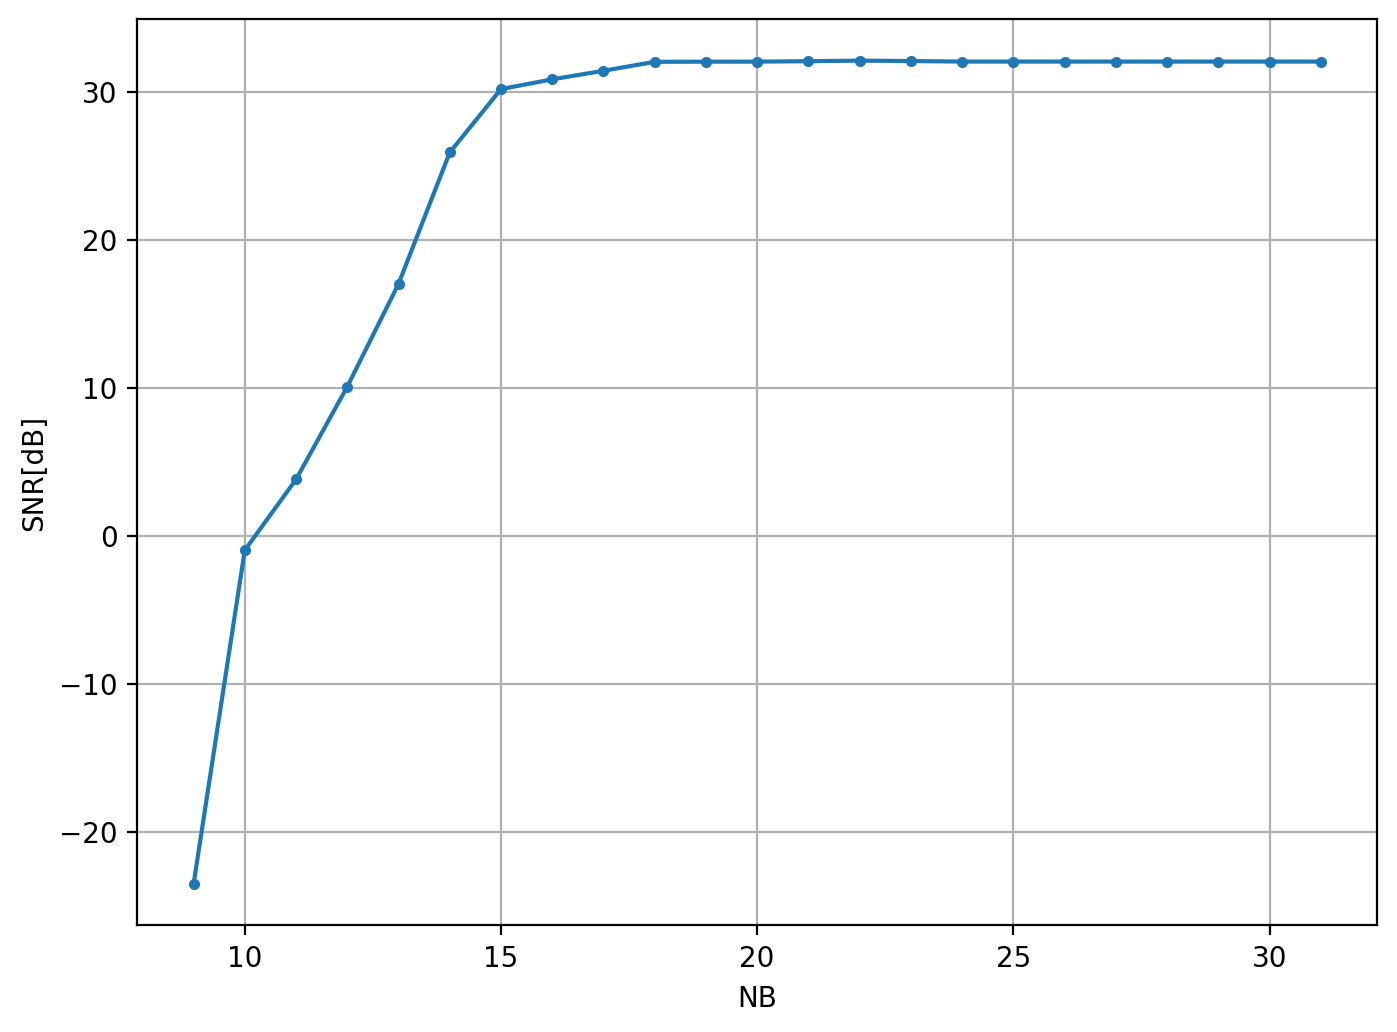

In [21]:
processData(sec1b,sec1a,sec2b,sec2a,sec3b,sec3a,NBsin,NBFsin,signal_gen)